## FERM 501 - Applied Financial Economics HW I - Nafiz Emir Eğilli

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.optimize as sco

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Q1-) Choose 5 stocks from S&P500 and download the last 5 year daily historical prices for these stocks and S&P 500 from Yahoo Finance using the Python codes that we discussed during the lecture. 

In [2]:
tickers = yf.download("NVDA, KO, XOM, AMZN, GOOG, ^GSPC", start="2019-02-27", end="2024-02-27")["Adj Close"]
tickers.head()

[*********************100%***********************]  6 of 6 completed


,AMZN,GOOG,KO,NVDA,XOM,^GSPC
Date,,,,,,
2019-02-27,82.054497,55.802502,38.444965,38.550713,61.645641,2792.379883
2019-02-28,81.991501,55.995998,38.787167,38.304886,61.304321,2784.489990
2019-03-01,83.586502,57.049500,38.821396,38.848686,62.056770,2803.689941
2019-03-04,84.808502,57.389999,39.052368,38.930634,62.297230,2792.810059
2019-03-05,84.621498,58.101501,39.009594,38.866074,62.204163,2789.649902


#### COMMENT: I have chosen Nvidia (NVDA), Coca Cola (KO), Amazon (AMZN), Alphabet Inc (GOOG) and Exxon Mobil (XOM).

### 1A-) Calculate mean, median, min, max and standard deviation of returns for the all stocks. Provide a small table for 5 stocks you selected and the S&P 500 index.

In [3]:
rets = tickers.pct_change().dropna()
stats = rets.describe().T.loc[:, ['mean', '50%', 'min', 'max', 'std']]
stats.columns = ['Mean', 'Median', 'Min', 'Max', 'Std Dev']
stats

,Mean,Median,Min,Max,Std Dev
AMZN,0.000846,0.000824,-0.140494,0.135359,0.022130
GOOG,0.000927,0.001335,-0.111008,0.104485,0.020082
KO,0.000452,0.000693,-0.096725,0.064796,0.013239
NVDA,0.002931,0.003011,-0.184521,0.243696,0.032565
XOM,0.000651,0.000174,-0.122248,0.126868,0.021611
^GSPC,0.000565,0.000852,-0.119841,0.093828,0.013395


### 1B-) Calculate the excess returns and Sharpe ratios for the 5 stocks you selected.

In [4]:
tickers = yf.download("NVDA, KO, XOM, AMZN, GOOG", start="2019-02-27", end="2024-02-27")["Adj Close"]
rets = tickers.pct_change().dropna()
stats = rets.describe().T.loc[:, ['mean', '50%', 'min', 'max', 'std']]
stats.columns = ['Mean', 'Median', 'Min', 'Max', 'Std Dev']

annualized_mean = rets.mean() * 252
annualized_std = rets.std() * np.sqrt(252)

risk_free_rate = yf.download("^TNX", start="2024-01-01", end="2024-02-27")['Adj Close'][-1] / 100
excess_returns = annualized_mean - risk_free_rate
sharpe_ratios = excess_returns / annualized_std

rets_sharpe_df = pd.DataFrame({'Excess Returns': excess_returns, 'Sharpe Ratios': sharpe_ratios})
rets_sharpe_df

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\emir.e\AppData\Local\Temp\ipykernel_22076\3634463227.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  risk_free_rate = yf.download("^TNX", start="2024-01-01", end="2024-02-27")['Adj Close'][-1] / 100


,Excess Returns,Sharpe Ratios
AMZN,0.170192,0.484459
GOOG,0.190539,0.597696
KO,0.070811,0.336929
NVDA,0.695601,1.345588
XOM,0.121166,0.353187


### Q2-) For the stock data that you downloaded:
### 2A-) Draw a scatterplot of standard deviation (x-axis) vs average annualized returns (y-axis) for all 6 assets. Discuss your observations.

C:\Users\emir.e\AppData\Local\Temp\ipykernel_22076\3852923311.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (annualized_std[i], annualized_mean[i]))


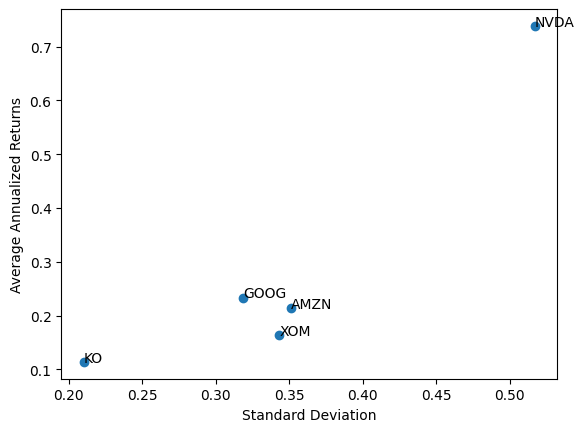

In [5]:
fig, ax = plt.subplots()
ax.scatter(annualized_std, annualized_mean)
for i, txt in enumerate(annualized_std.index):
     ax.annotate(txt, (annualized_std[i], annualized_mean[i]))
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Average Annualized Returns')
plt.show()

#### COMMENT: The scatterplot analysis indicates that NVIDIA Corporation (NVDA) presents the highest level of both risk and return, positioning it as the investment with the greatest Sharpe ratio among the sampled stocks. Conversely, Coca-Cola Company (KO) exhibits the lowest risk and return profile, resulting in the lowest Sharpe ratio. Among the remaining three stocks, Alphabet Inc. (GOOG) appears to be the most favorable option, as it offers the highest returns relative to its risk compared to its counterparts.

### 2B-) On the same chart, draw the Efficient Frontier line for the combination of 5 stocks using either the simulation method or the optimizer that we used in the lectures. (Xaxis: portfolio standard deviation, Y-axis portfolio return)

C:\Users\emir.e\AppData\Local\Temp\ipykernel_22076\3166587631.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),y=avg_returns[asset_index],


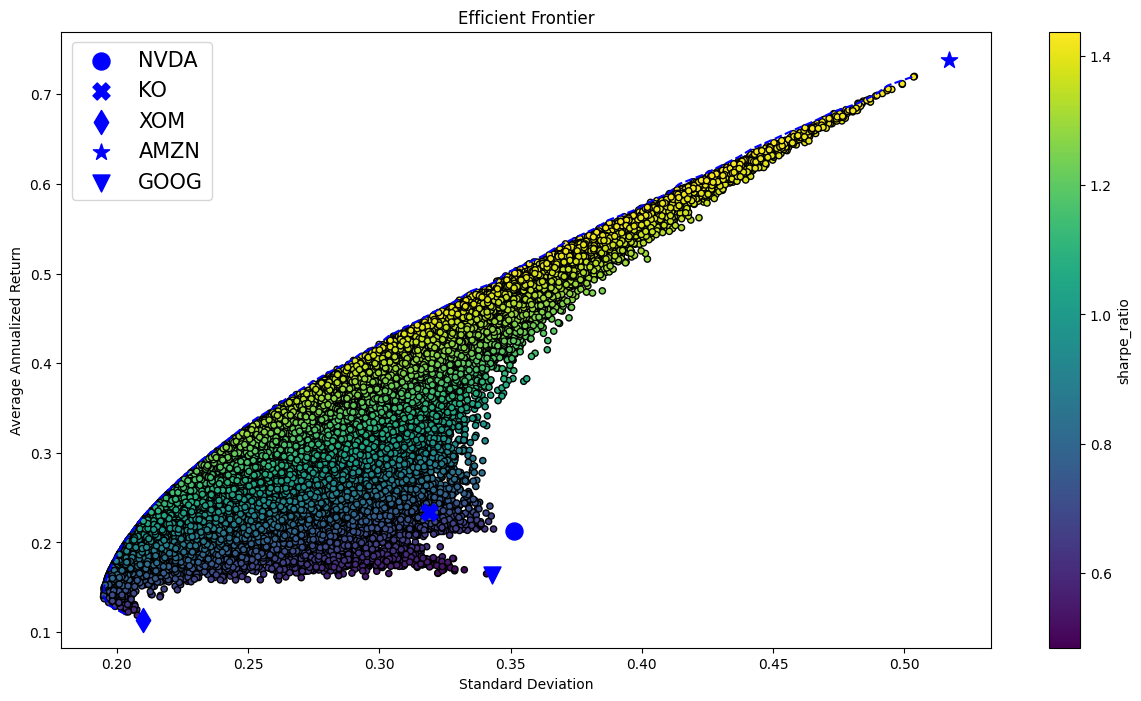

In [6]:
n_assets = 5

N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
avg_returns = rets.mean() * N_DAYS
cov_mat = rets.cov() * N_DAYS

from datetime import datetime
np.random.seed(int(np.round(datetime.now().timestamp(),0)))

weights = np.random.lognormal(size=(N_PORTFOLIOS, n_assets))

weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

portf_results_df = pd.DataFrame({'returns': portf_rtns,'volatility': portf_vol,'sharpe_ratio':portf_sharpe_ratio})

N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(),portf_results_df.returns.max(),N_POINTS)

portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns ==portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

MARKS = ['o', 'X', 'd', '*', 'v', 's']
RISKY_ASSETS = ['NVDA', 'KO', 'XOM', 'AMZN', 'GOOG']

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', edgecolors='black', ax=ax)
ax.set(xlabel='Standard Deviation',ylabel='Average Annualized Return',title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),y=avg_returns[asset_index],
               marker=MARKS[asset_index],s=150,color='blue',
               label=RISKY_ASSETS[asset_index])

ax.legend(loc='best',prop={'size': 15})

### 2C-) Find the weights of the minimum variance portfolio and show the standard deviation and mean return of the min. var. portfolio on the same chart. 

In [7]:
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]
min_vol_portf
print('Minimum variance portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)


print('\nWeights')

for x, y in zip(RISKY_ASSETS,weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum variance portfolio ----
Performance
returns: 13.93% volatility: 19.50% sharpe_ratio: 71.44% 
Weights
NVDA: 13.20% KO: 3.49% XOM: 70.18% AMZN: 0.28% GOOG: 12.86% 

### 2D-) Find the weights of the maximum Sharpe portfolio and show the standard deviation and mean return of the max. Sharpe portfolio on the same chart.

In [8]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
print('Maximum Sharpe ratio portfolio ----')
print('Performance')

for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)


print('\nWeights')

for x, y in zip(RISKY_ASSETS,weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
returns: 59.55% volatility: 41.42% sharpe_ratio: 143.76% 
Weights
NVDA: 0.80% KO: 1.30% XOM: 15.27% AMZN: 76.21% GOOG: 6.42% 

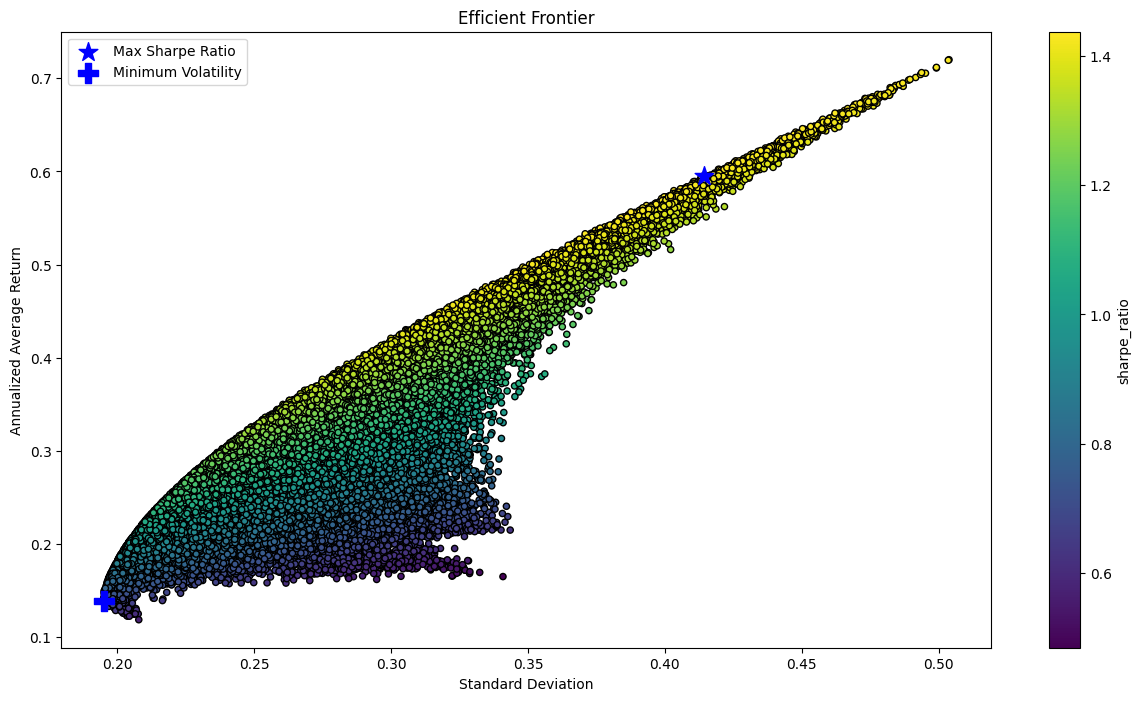

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
portf_results_df.plot(kind='scatter', x='volatility',y='returns', c='sharpe_ratio', edgecolors='black',ax=ax)
ax.scatter(x=max_sharpe_portf.volatility,y=max_sharpe_portf.returns,c='blue', marker='*',s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility,y=min_vol_portf.returns,c='blue', marker='P',s=200, label='Minimum Volatility')
ax.set(xlabel='Standard Deviation', ylabel='Annualized Average Return',title='Efficient Frontier')
ax.legend()

### Q3-) Calculate the weights of the Risk Parity portfolio for the 5 stocks you selected. Compare your results with the minimum variance and maximum Sharpe portfolios. Discuss your observations. 

In [10]:
def calculate_risk_contribution(weights, covariance_matrix):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    marginal_risk_contribution = np.dot(covariance_matrix, weights) / portfolio_volatility
    risk_contribution = weights * marginal_risk_contribution
    return risk_contribution

def risk_parity_portfolio_cov(returns):
    # Calculate the covariance matrix
    covariance_matrix = returns.cov().values * 252  # Annualize covariance

    # Initial weights (equal weights)
    n_assets = returns.shape[1]
    initial_weights = np.ones(n_assets) / n_assets

    # Objective function: minimize the difference in risk contributions
    def objective(weights):
        risk_contributions = calculate_risk_contribution(weights, covariance_matrix)
        return np.std(risk_contributions)  # Minimize the standard deviation of risk contributions

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Bounds for weights: no short selling
    bounds = tuple((0, 1) for asset in range(n_assets))

    # Optimization
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    # Check if optimization was successful
    if not result.success:
        raise ValueError("Optimization failed")

    # Return the optimized weights
    if isinstance(returns, pd.DataFrame):
        return pd.Series(result.x, index=returns.columns)
    else:
        return result.x

In [11]:
asset_returns = rets
rppWeights = risk_parity_portfolio_cov(asset_returns)
print(rppWeights)

AMZN    0.176759
GOOG    0.175299
KO      0.319755
NVDA    0.117714
XOM     0.210474
dtype: float64


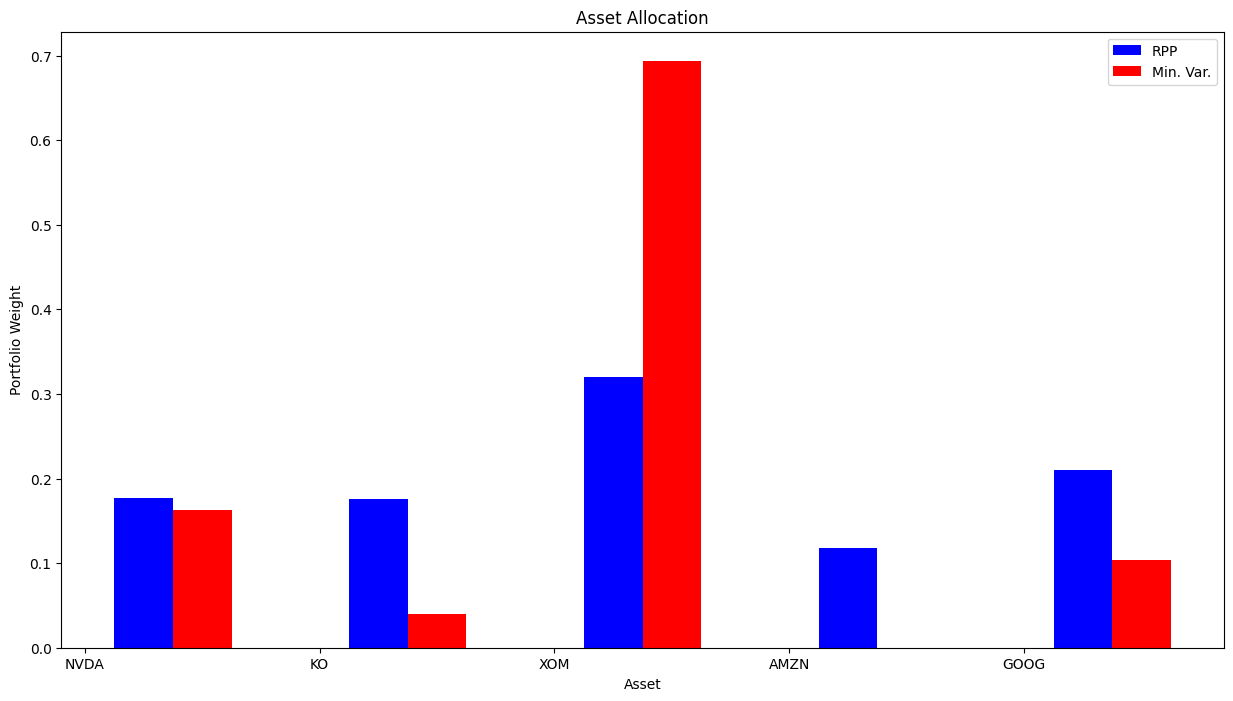

In [12]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(),portf_results_df.returns.max(),N_POINTS)

portf_rtns_ef = np.round(portf_rtns_ef, 2)
rtns_range = portf_rtns_ef

efficient_portfolios = []
n_assets = len(avg_returns)
args = (cov_mat)
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets, ]
for ret in portf_rtns_ef:
    constraints = ({'type':'eq','fun': lambda x: get_portf_rtn(x, avg_returns)- ret},{'type':'eq','fun': lambda x: np.sum(x) - 1})
    efficient_portfolio=sco.minimize(get_portf_vol,initial_guess,args=args,method='SLSQP',constraints=constraints,bounds=bounds)
    efficient_portfolios.append(efficient_portfolio)

vols_range = [x['fun'] for x in efficient_portfolios]
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']
min_vol_portf = {'Return': min_vol_portf_rtn,'Volatility':
                 min_vol_portf_vol,'Sharpe Ratio': (min_vol_portf_rtn /min_vol_portf_vol)}

#plt.style.use('ggplot')
plt.figure(figsize=(15,8))
y1 = rppWeights
y2 = efficient_portfolios[min_vol_ind]['x']

X = np.arange(5)
plt.bar(X + 0.25, y1, color = 'b', width = 0.25)
plt.bar(X + 0.50, y2, color = 'r', width = 0.25)

Labels = RISKY_ASSETS
plt.xticks(X, Labels)
plt.legend(['RPP','Min. Var.'])
plt.xlabel('Asset')
plt.ylabel('Portfolio Weight')
plt.title('Asset Allocation')

plt.show()

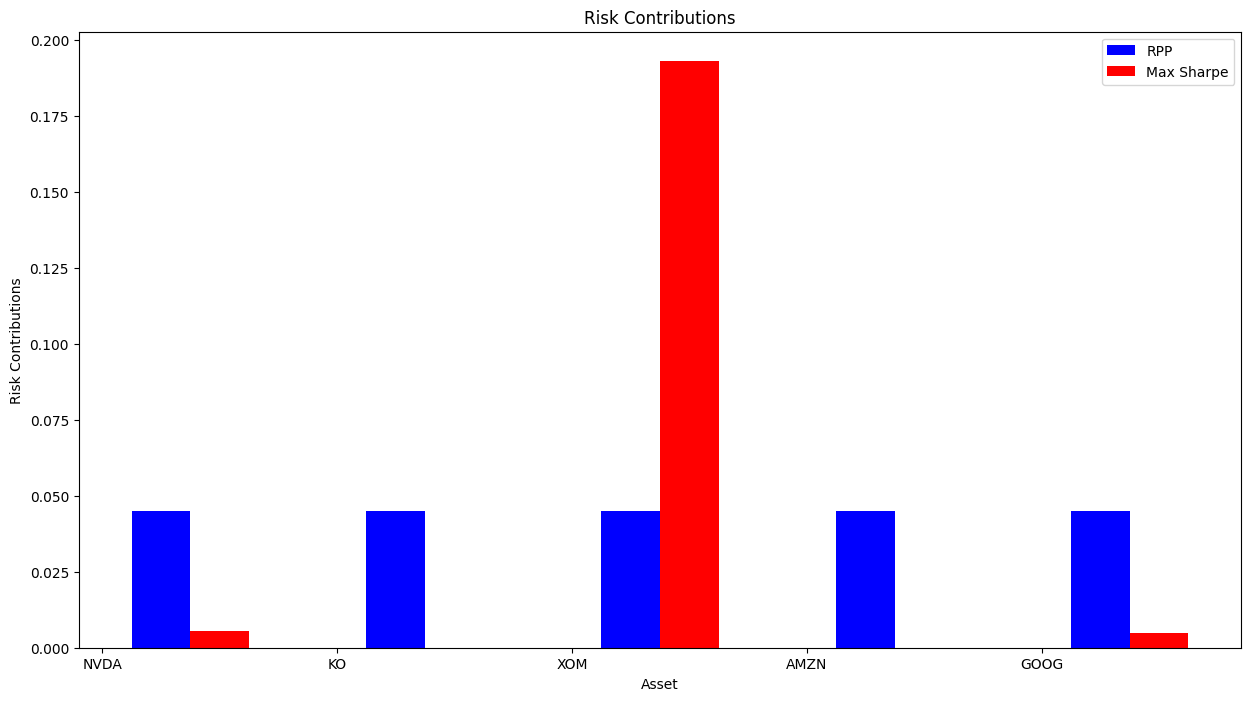

In [14]:
max_sharpe_ind = np.argmax(vols_range/rtns_range)
max_sharpe_portf_rtn = rtns_range[max_sharpe_ind]
max_sharpe_portf_vol = efficient_portfolios[max_sharpe_ind]['fun']
max_sharpe_portf = {'Return': max_sharpe_portf_rtn,'Volatility':
                 max_sharpe_portf_vol,'Sharpe Ratio': (max_sharpe_portf_rtn /max_sharpe_portf_vol)}

plt.figure(figsize=(15,8))
y1 = calculate_risk_contribution(rppWeights, cov_mat)
max_sharpe_weights = efficient_portfolios[max_sharpe_ind]['x']
y2 = calculate_risk_contribution(max_sharpe_weights, cov_mat)

X = np.arange(5)
plt.bar(X + 0.25, y1, color = 'b', width = 0.25)
plt.bar(X + 0.50, y2, color = 'r', width = 0.25)

Labels = RISKY_ASSETS
plt.xticks(X, Labels)
plt.legend(['RPP','Max Sharpe'])
plt.xlabel('Asset')
plt.ylabel('Risk Contributions')
plt.title('Risk Contributions')

plt.show()

#### COMMENT: In the first chart for Asset Allocation, we can observe that the Minimum Variance Portfolio has a large weight in XOM, indicating that this stock is likely perceived to have the lowest risk compared to the others. On hte other hand, the Risk Parity Portfolio prompts a more balanced allocation across NVDA, KO and GOOG, with XOM having smaller weight and AMZN having no allocation at all.

#### Checking the second chart, which illustrates Risk Contributions, shows us that the Max Sharpe Portfolio has a much higher risk contribution from XOM, which constrasts with the more balanced risk contributions of each stock in the Risk Parity Portfolio. 